**Import Statements**

In [0]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt

**Utility Functions**

In [0]:
def get_background(frame,images):
# getting shape of the frame to create background
  row,col = frame.shape
  background = np.zeros([row,col],np.uint8) #All black image
  background = np.median(images,axis=0) #bg
  background = background.astype(np.uint8) # by median openration data type of background changes so again change it to uint8
  bg = background.copy()
  bg = cv2.cvtColor(bg, cv2.COLOR_GRAY2RGB)
  plt.imshow(bg)
  return background

def get_foreground_objects(img,background,threshold):
  res = cv2.absdiff(img,background)
  c,d = res.shape
  for i in range(c):
    for j in range(d):
      if res[i][j] > threshold:
        res[i][j] = 255
      else:
        res[i][j] = 0
  plt.imshow(res)
  return res


def get_connected_components(res,connectivity):
  nb_components, output, stats, centroids = cv2.connectedComponentsWithStats(res, connectivity)
  sizes = stats[1:, -1]; nb_components = nb_components - 1
  img2 = np.zeros((output.shape),dtype = np.uint8)
  num_components = 0
  for i in range(0, nb_components):
    img2[output == i + 1] = 255
    num_components = num_components+1
  plt.imshow(img2)
  return nb_components,stats

def draw_boxes(components,stats,original_img):
  for i in range(components):
    x, y = stats[i,cv2.CC_STAT_LEFT], stats[i,cv2.CC_STAT_TOP]
    w, h = stats[i,cv2.CC_STAT_WIDTH], stats[i,cv2.CC_STAT_HEIGHT]
    area = stats[i,cv2.CC_STAT_AREA]
    if area < 100:
      continue
    else:
      rect = [x, y, w, h]
      cv2.rectangle(original_img, (rect[0],rect[1]), (rect[0]+rect[2],rect[1]+rect[3]), (0, 255, 0), 2)
  plt.imshow(original_img)
  return original_img


**Image loading**

In [26]:
images = []
img_sequence_dir = '/content/drive/My Drive/CV_GroupProject/sequence_imgs/'
img_sequence_files = os.listdir(img_sequence_dir)

img_colour = cv2.imread('/content/drive/My Drive/CV_GroupProject/sequence_imgs/000187.jpg')
img = cv2.cvtColor(img_colour,cv2.COLOR_BGR2GRAY)

print('start loading ' + str(len(img_sequence_files)) + ' all image files')
for img_sequence_file in img_sequence_files:
    img_filepath = img_sequence_dir + img_sequence_file
    frame = cv2.imread(img_filepath)
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    images.append(frame)


start loading 795 all image files


**Pedestrian detection**

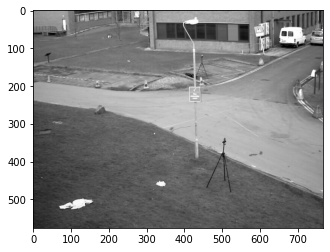

In [27]:
bg = get_background(frame,images)

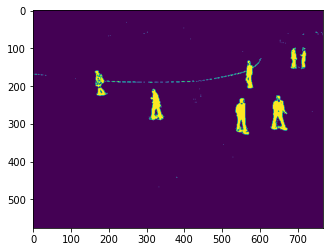

In [28]:
fg  = get_foreground_objects(img,bg,20)

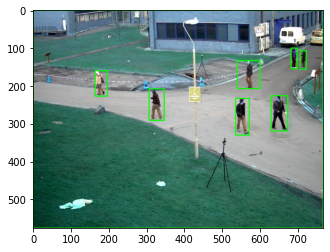

In [29]:
components,stats = get_connected_components(fg,8)
img_boxes = draw_boxes(components,stats, img_colour )